# Housing price (Regression problem)

In this note which is a regression problem I will use the following techniques:

* **Data visualization**: Looking into data statistics, some plots, correlation of features with the target (house price) 
* **Data cleaning**: Separation of numerical and non-numerical features. Handling missing values with several techniques including **predicting missing values**. Preparing non-numerical data with **One-Hot encoding**.
* Using different ML algorithm: **RandomForest** , **SVM**, **NN**, **KNN**
* **Hyper-parameter tuning** with taking plot and using **grid-search** using cross validation set.
* fit the model over all training data and predicting the result of test set.

## Overview:
* Data Visualization 
* Numeric vs non-numerical features
* First prediction: numerical features with non-missing values
* Second round: adding non_numerical features with non-missing values
* Handling missing numerical values: filling with mean, median, KNN, iterative method, and predicting
* Handling missing non-numerical values: filling with new cateory, mode, and predicting

In [5]:
import numpy as np 
import pandas as pd 

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

# Ml packages
from sklearn.ensemble import RandomForestClassifier # need to predict missing categorical values
from sklearn.ensemble import RandomForestRegressor # for predicting the price
from sklearn.model_selection import train_test_split # spliting data into train and cv sets.

from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


## 1) Data visualization

In [6]:
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [3]:
print('dataset shape:',dataset.shape)
print('testset shape:',testset.shape)

dataset shape: (1460, 81)
testset shape: (1459, 80)


So we have 81 columns where one of them is the target and the rest are potential features. The number of data is normal but not large.

Lets look at the top 5 data:

In [7]:
pd.set_option("display.max.columns", None)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Also we can see the data statistics: (only numerical features)

In [6]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
testset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


There is not that much deferenc between mean value and other parameters of testset and dataset, which shows that the testset has been normally extracted from different part of dataset.

The statistics show we have some houses with super high quality, such as LotArea and etc. However, I do not count them as outlier as their price shall be high as well.

Moreover, we know that the target is 'SalePrice' and the 'Id' is the counting number and is not a feature.

* Lets look into the type of each column and see its description from txt file

In [8]:
pd.set_option("display.max.rows", None)
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Columns description:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class

* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

#### Numerical vs non_Numerical features

In [9]:
# select numeric columns
data_numeric = dataset.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

# select non numeric columns
data_non_numeric = dataset.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

print("non numerical columns are", non_numeric_cols)

print("numerical columns are", numeric_cols)

non numerical columns are ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']
numerical columns are ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPor

#### Data with missing values

In [13]:
Null=dataset.isnull().sum()
Null[Null>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
Null=testset.isnull().sum()
Null[Null>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

'Electrical' is the only features which has missing values in dataset but not in testset.

In [10]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)
y=dataset['SalePrice']
X_tot = pd.concat([X_dataset, testset],axis=0)

In [11]:
Null=X_tot.isnull().sum()
Full_null_list = Null[Null>0].index.to_list()

Full_notnull_list=Null[Null==0].index.to_list()


In [12]:
# select numeric columns
missing_numeric_cols = dataset[Full_null_list].select_dtypes(include=[np.number]).columns.values
notnull_numeric_cols = dataset[Full_notnull_list].select_dtypes(include=[np.number]).columns.values
# select non numeric columns
missing_non_numeric_cols = dataset[Full_null_list].select_dtypes(exclude=[np.number]).columns.values
notnull_non_numeric_cols = dataset[Full_notnull_list].select_dtypes(exclude=[np.number]).columns.values
print("non numerical columns with missing values are", missing_non_numeric_cols)

print("numerical columns with missing values are", missing_numeric_cols)

non numerical columns with missing values are ['MSZoning' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature'
 'SaleType']
numerical columns with missing values are ['LotFrontage' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'GarageYrBlt' 'GarageCars'
 'GarageArea']


#### Visualization of number of missing data

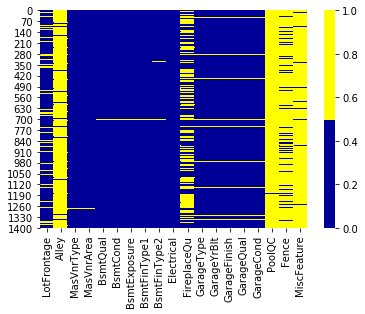

In [27]:
## **Dataset**
Null=dataset.isnull().sum()
null_list = Null[Null>0].index.to_list()
cols= null_list
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

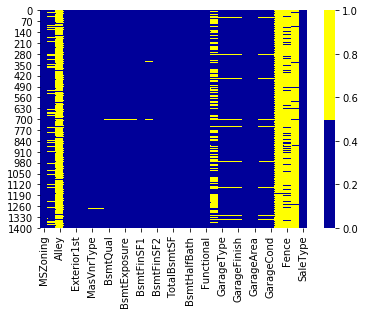

In [26]:
##Testset
Null=testset.isnull().sum()
null_list = Null[Null>0].index.to_list()
cols= null_list
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

## 1) First ML model
#### non-missing numerical features

I start with the simplest possible case, which is using all numerical features with non-missing values.

We choose RandomForest algorithm as one of the most simplest algorithms based ensembling method.

By doing ensemble, it avoids overfitting.

We define two metrics to test the performance of the algorithm: mean absolute percentage error and mean absolute logaritmic error

#### Metrics:

In [39]:
def mean_perc_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_log_error(y_true, y_pred): 
    return np.mean(np.abs((np.log(y_true) - np.log(y_pred))))

In [46]:
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))

X=X_dataset.drop(features_to_drop, axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 12.53803613596984 %
mean logarithmic error is: 0.1160140476591886


The relative error (12%) seem to be acceptable for housing price. But Lets see if we can make it better. Also see how to deal with non-numerical features, missing values and outliers

#### Scaling
The numerical data span different range of values. To increase the efficiency of our model, it is better to scale all parameters.

In [50]:
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))

X=X_dataset.drop(features_to_drop, axis=1)

feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 12.541786187576667 %
mean logarithmic error is: 0.11601056356499309


It didn't help. It seems RandomForset performs well without scaling but for some other algorithms it is better to use scaling. So I keep it.

## 2) Selecting numerical features

In [52]:
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))

cor=dataset.drop(features_to_drop, axis=1).corr()

cor_target = abs(cor["SalePrice"])

cor_target[cor_target>0.5].index.to_list()



['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'SalePrice']

In [55]:
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5].index.to_list()
relevant_features.remove('SalePrice')
X=X_dataset[relevant_features]

feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 13.604648251841942 %
mean logarithmic error is: 0.1254732788908146


It seems with only 7 features I can get not a bad prediction accuracy. 

I want to try other threshold for it

In [57]:
Tresh=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5]
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
for tr in Tresh:
    relevant_features = cor_target[cor_target>tr].index.to_list()
    relevant_features.remove('SalePrice')
    X=X_dataset[relevant_features]
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
    model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
    y_pred = model.fit(X_train, y_train).predict(X_valid)
    print(tr,mean_perc_error(y_valid,y_pred),mean_log_error(y_valid,y_pred))

0 12.53803613596984 0.1160140476591886
0.05 12.494107263778648 0.11581018647858256
0.1 13.184195516973046 0.12108547177392681
0.15 13.175240580977748 0.12130815499397546
0.2 13.218241792398613 0.12166501881023851
0.25 13.218241792398613 0.12166501881023851
0.3 13.33371574225302 0.12339654431369382
0.4 13.194815772826654 0.12196091548256903
0.5 13.609140576243261 0.12551781838808238


The best choice is selecting features with correlation higher than 0.05. This method removes non-correlated features such as ID. Even if they have a small effect on CV, I expect them to have zero effect in reality and they should be removed.

## 3) Non-numerical features

Here, I add non-numerical features without any missing values

In [86]:
features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 12.279083060263794 %
mean logarithmic error is: 0.11397319443026152


It made it a little better

## 4) Handling Numerical missing values

Now, we are in the step to handle missing values. In this step we only use the dataset to fill the missing values both in dataset itself and testset.

There exist different ways of dealing with missing data. Some examples are as following:

* Delete the entire row
* Delete the feature
* Replace the missing value with mean, median, mode of the whole dataset
* Replace the missing value with next, last or some sequence of data if the data is sorted in a rational way
* use other algorithms such as iterative or KNN
* Predicting the missing value

Here, I will test the followings: using mean, median and mode, iterative and KNN and predicting the missing value.
One can also apply clustering and take the mean (or mode or median) of the same cluster for the missing value.

Before starting, lets take a look at amount of missing data again, but in another way; percantage of missing data

In [88]:
Null=dataset.isnull().sum()
null_list=Null[Null>0].index.to_list()
for col in dataset[null_list]:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18.0%
Alley - 94.0%
MasVnrType - 1.0%
MasVnrArea - 1.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinType2 - 3.0%
Electrical - 0.0%
FireplaceQu - 47.0%
GarageType - 6.0%
GarageYrBlt - 6.0%
GarageFinish - 6.0%
GarageQual - 6.0%
GarageCond - 6.0%
PoolQC - 100.0%
Fence - 81.0%
MiscFeature - 96.0%


In [89]:
Null=testset.isnull().sum()
null_list=Null[Null>0].index.to_list()
for col in testset[null_list]:
    pct_missing = np.mean(testset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

MSZoning - 0.0%
LotFrontage - 16.0%
Alley - 93.0%
Utilities - 0.0%
Exterior1st - 0.0%
Exterior2nd - 0.0%
MasVnrType - 1.0%
MasVnrArea - 1.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinSF1 - 0.0%
BsmtFinType2 - 3.0%
BsmtFinSF2 - 0.0%
BsmtUnfSF - 0.0%
TotalBsmtSF - 0.0%
BsmtFullBath - 0.0%
BsmtHalfBath - 0.0%
KitchenQual - 0.0%
Functional - 0.0%
FireplaceQu - 50.0%
GarageType - 5.0%
GarageYrBlt - 5.0%
GarageFinish - 5.0%
GarageCars - 0.0%
GarageArea - 0.0%
GarageQual - 5.0%
GarageCond - 5.0%
PoolQC - 100.0%
Fence - 80.0%
MiscFeature - 97.0%
SaleType - 0.0%


'Alley', 'FireplaceQu' , 'PoolQC' , 'PoolQC' ,'Fence','MiscFeature' have many nan values in both sets, so I remove them from the features

In [101]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.603647837794998 %
mean logarithmic error is: 0.10645255235707632


It became better.Lets do it with median too

In [93]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].median()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.627520890713777 %
mean logarithmic error is: 0.10656236525516562


They are almost the same. But what is the difference between mean and median:

The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. The median is the middle value when a data set is ordered from least to greatest.

**Another Way** of imputing mean or median

In [97]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)


col = X_dataset.select_dtypes(include=[np.number]).columns.values

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_dataset[col])
X_dataset[col]=imp.transform(X_dataset[col])


features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.603647837794998 %
mean logarithmic error is: 0.10645255235707632


#### Iterative imputation

In [110]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)


col = X_dataset.select_dtypes(include=[np.number]).columns.values

imp = IterativeImputer(max_iter=10, random_state=1)
imp.fit(X_dataset[col])
X_dataset[col]=imp.transform(X_dataset[col])


features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.593007303183146 %
mean logarithmic error is: 0.10601164057983697


#### KNN Imputation

In [109]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)


col = X_dataset.select_dtypes(include=[np.number]).columns.values

imp = KNNImputer(n_neighbors=5, weights="uniform")
imp.fit(X_dataset[col])
X_dataset[col]=imp.transform(X_dataset[col])


features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.65010846678312 %
mean logarithmic error is: 0.10660070601497884


So the best method was iterative imputation.

Note that the features with many missing values deleted themselves as I am using features with high correlations than 0.05 with the target.

Next, we try **predicting the missing values**.

In [113]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

features_to_drop=np.concatenate((non_numeric_cols, missing_numeric_cols))

X2n=X_dataset.drop(features_to_drop, axis=1,inplace = False)

for col in missing_numeric_cols:
    yn=dataset[col]
    X2_train= X2n[pd.notnull(yn)]
    X2_test= X2n[pd.isnull(yn)] 
    yn_train=yn[pd.notnull(yn)]
    model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=1)
    if (yn.isnull().sum()>0):
        yn_pred=model.fit(X2_train,yn_train).predict(X2_test)
        X_dataset.loc[X_dataset[col].isnull(), col]=pd.Series(yn_pred).reindex(np.arange(X_dataset[col].isnull().sum())).values

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(notnull_non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in notnull_non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    

    
feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

mean percentage error is: 11.682433582270187 %
mean logarithmic error is: 0.10679046374072255


I did not use the test set at all in any prediction as I assumed it as a new data and not available at the moment of calculation.
Moreover, I did not used the target to predict the missing values as it may result in overfitting.

After all, it seems using the mean is the best option.

Another way is to cluster the data, then take the average on that.

## 5) Handling missing values in non-numerical set

Here, I can use the following techniques:
    
* filling with new category
* filling with mode
* predicting missing values
First:

**using new category**

In [144]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in missing_non_numeric_cols:
    X[col] = dataset[col].fillna('new_cat')


for col in non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    



feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))

C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


mean percentage error is: 11.478267793272089 %
mean logarithmic error is: 0.10494998777601446


**mode**

In [145]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in missing_non_numeric_cols:
    m=X[col].mode()
    X[col]=X[col].fillna(m)


for col in non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    



feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))


C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


mean percentage error is: 11.5538445657218 %
mean logarithmic error is: 0.105854540851183


**Predicting missing values**

In [146]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(non_numeric_cols.tolist())

X=X_dataset[relevant_features]

X2n=dataset[notnull_non_numeric_cols]
for col in notnull_non_numeric_cols:
    X2n = pd.get_dummies(X2n, columns = [col])
    



for col in missing_non_numeric_cols:
    yn=dataset[col]   
    X2_train= X2n[pd.notnull(yn)]
    X2_test= X2n[pd.isnull(yn)] 
    yn_train=yn[pd.notnull(yn)]
    model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
    if (yn.isnull().sum()>0):
        yn_pred=model.fit(X2_train,yn_train).predict(X2_test)
        X.loc[X[col].isnull(), col]=pd.Series(yn_pred).reindex(np.arange(X[col].isnull().sum())).values



for col in non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    



feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)

print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))


C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

mean percentage error is: 11.607551500596427 %
mean logarithmic error is: 0.1062197016254678


So the best way is to use a new category.

## 6) Training different algorithms

In [147]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)

features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(non_numeric_cols.tolist())

X=X_dataset[relevant_features]

for col in missing_non_numeric_cols:
    X[col] = dataset[col].fillna('new_cat')


for col in non_numeric_cols:
    X = pd.get_dummies(X, columns = [col])
    



feature_scaler = MinMaxScaler() # Or StandardScaler()
X = feature_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)


C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [148]:
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)
print('Random Forest')
print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))


knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='ball_tree', leaf_size=50, p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print('nearest neighbor')
print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))



model=MLPRegressor(random_state=1, max_iter=1000 , solver='lbfgs' , hidden_layer_sizes=200 )
y_pred = model.fit(X_train, y_train).predict(X_valid)
print('Neural Network')
print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))



svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_valid)
print('SVR, kernel=rbf')
print('mean percentage error is:', mean_perc_error(y_valid,y_rbf), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_rbf))

svr_lin = SVR(kernel='linear', C=1)
y_lin = svr_lin.fit(X_train, y_train).predict(X_valid)
print('SVR, kernel=linear')
print('mean percentage error is:', mean_perc_error(y_valid,y_lin), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_lin))

svr_poly = SVR(kernel='poly', C=1, degree=2)
y_poly = svr_poly.fit(X_train, y_train).predict(X_valid)
print('SVR, kernel=poly')
print('mean percentage error is:', mean_perc_error(y_valid,y_poly), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_poly))



Random Forest
mean percentage error is: 11.478267793272089 %
mean logarithmic error is: 0.10494998777601446
nearest neighbor
mean percentage error is: 15.535517323323017 %
mean logarithmic error is: 0.14522624057965447


C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Network
mean percentage error is: 14.431144898691755 %
mean logarithmic error is: 0.1449169905244693
SVR, kernel=rbf
mean percentage error is: 35.60918129616935 %
mean logarithmic error is: 0.3304957106408604
SVR, kernel=linear
mean percentage error is: 34.631333888077734 %
mean logarithmic error is: 0.3220705442311771
SVR, kernel=poly
mean percentage error is: 35.58578312314528 %
mean logarithmic error is: 0.33022082453629265


So I choose RandomForest

## 7) Hyper-parameter tuning

Text(0.5, 1.0, 'Test of Different Parameters')

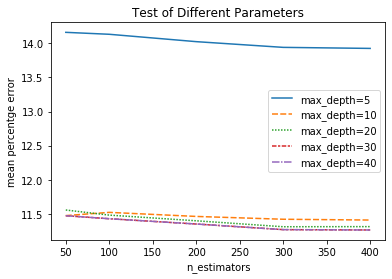

In [150]:
def BuildValidModel(n_esti, max_depth):
    model = RandomForestRegressor(n_estimators=n_esti, max_depth=max_depth, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    MPAE=mean_perc_error(y_valid, y_pred)
    return MPAE


n_esti=[50,100,200,300,400]
max_depth=[5,10,20,30,40]

# run function several times and save results in a data frame
accuracy=dict()
for i in range(5):
    a=[]
    for j in range(5):
        a.append(BuildValidModel(n_esti[j],max_depth[i]))
    accuracy['max_depth='+str(max_depth[i])]=a
accu_data=pd.DataFrame(accuracy,index=n_esti)

# plot results
ax=sns.lineplot(data=accu_data)
ax.set(xlabel='n_estimators', ylabel='mean percentge error')
plt.title('Test of Different Parameters')

n_esti=300, max_depth=30 gives the best option

In [151]:
model = RandomForestRegressor(n_estimators=300, max_depth=30, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_valid)
print('Random Forest')
print('mean percentage error is:', mean_perc_error(y_valid,y_pred), '%')
print('mean logarithmic error is:', mean_log_error(y_valid,y_pred))


Random Forest
mean percentage error is: 11.273322652147028 %
mean logarithmic error is: 0.1033411744525525


## 8) Finalizing

Here, I should do all the steps again, apply the feature cleaning to the testset as well.
Then train the model over the complete dataset (instead of trainset) and apply it to the testset.

In [ ]:
pd.get_dummies

In [173]:
X_dataset.fillna(axis=1)

((1460, 80), (1459, 80))

In [13]:
X_dataset=dataset.drop('SalePrice',axis=1,inplace=False)
X_test=testset

for col in missing_numeric_cols:
    m=X_dataset[col].mean()
    X_dataset[col]=X_dataset[col].fillna(m)
    X_test[col]=X_test[col].fillna(m)
    
features_to_drop=non_numeric_cols
cor=dataset.drop(features_to_drop, axis=1).corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05].index.to_list()
relevant_features.remove('SalePrice')


relevant_features.extend(non_numeric_cols.tolist())

X=X_dataset[relevant_features]
X_test=X_test[relevant_features]


for col in missing_non_numeric_cols:
    m=X[col].mode()
    X[col]=X[col].fillna(m)
    X_test[col]=testset[col].fillna(m)
    

X_tot = pd.concat([X, X_test],axis=0)

for col in non_numeric_cols:
    X_tot = pd.get_dummies(X_tot, columns = [col])
    
X = X_tot[:1460]
X_test = X_tot[1460:]

print(X.shape,X_test.shape)

feature_scaler = MinMaxScaler() # Or StandardScaler()
feature_scaler.fit(X)
X=feature_scaler.transform(X)
X_test = feature_scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=300, max_depth=30, random_state=1)
y_test = model.fit(X, y).predict(X_test)

output = pd.DataFrame({'Id': testset.Id,
                       'SalePrice': y_test})
output.to_csv('submission.csv', index=False)

output.head()

C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\farpa529\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(1460, 281) (1459, 281)


,Id,SalePrice
0,1461,128257.910000
1,1462,156539.333333
2,1463,180157.990000
3,1464,183281.753333
4,1465,198111.210000
